# CARTE-Enbridge Bootcamp
#### Lab 1-1b

In this lab, we'll delve into:

- Working with NumPy and pandas
- Data Loading and Cleaning
- Basic Data Visualization

Let's get started!

## NumPy and Pandas

### NumPy

NumPy is a Python library that provides a variety of useful features for working with numerical data.  The most important feature of NumPy is the **NumPy array**, a data structure that (as the name implies) is similar to a Python list, but provides additional features that make it useful for data science.  Let's take a look at some of the advantages NumPy arrays have over Python lists:

- **Ease of use:** You can write small, concise, and intuitive mathematical expressions like `X + 2` and `X * Y` (where `X` and `Y` are arrays), and the operations will be performed _element-wise_ (sometimes called _vectorized_).  This means that unlike Python lists, you don't have to write loops in order to make simple mathematical operations!
- **Performance:** NumPy arrays are implemented in C under the hood, meaning that operations on large arrays can be orders of magnitude faster than operations on Python lists!
- **Useful features:** NumPy provides many convenience functions and methods for performing quick and accurate mathematical operations and conversions on your data.  For example, you can compute the mean and standard deviation of an array using `np.mean()` and `np.std()`, respectively.
- **Broad applicability:** NumPy is the base of the entire Python data science ecosystem.  Practically every data science library for Python leverages NumPy in some way, making it a crucial skill to master for data science.

#### Creating NumPy Arrays

There are a variety of ways to create NumPy arrays, but the easiest way is to convert an existing list using `np.array()`.  Let's create a NumPy array from a list of integers:


In [1]:
import numpy as np  # convention, np is the standard alias

my_list = [1, 2, 3, 4, 5]
my_array = np.array(my_list)

print(my_array)
print(my_array * 2)
print(my_array.sum())

[1 2 3 4 5]
[ 2  4  6  8 10]
15


## Pandas

Pandas is a Python library that provides additional data structures and data manipulation methods that make working with data easier.  The primary data structures in Pandas are **Series** and **DataFrames**.  A **Series** is a one-dimensional array of data where each element is labeled with an index.  A **DataFrame** is a tabular data structure comprised of rows and columns, similar to a spreadsheet, database table, or R's data.frame object.  Pandas is one of the most popular data science libraries for Python, and will be used heavily in this course.

One of many convenient features of Pandas is that it can read in just about any tabular data - including CSVs, Excel spreadsheets, and SQL tables - and convert them to DataFrames.  In this example, we will load a CSV from a URL (yes, it can download files too!) and convert it to a DataFrame:

In [2]:
import pandas as pd

# Read in the CSV file
df = pd.read_csv(
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/banklist.csv"
)

# Display the first 5 rows of the DataFrame
df.head(5)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Banks of Wisconsin d/b/a Bank of Kenosha,Kenosha,WI,35386,"North Shore Bank, FSB",31-May-13,31-May-13
1,Central Arizona Bank,Scottsdale,AZ,34527,Western State Bank,14-May-13,20-May-13
2,Sunrise Bank,Valdosta,GA,58185,Synovus Bank,10-May-13,21-May-13
3,Pisgah Community Bank,Asheville,NC,58701,"Capital Bank, N.A.",10-May-13,14-May-13
4,Douglas County Bank,Douglasville,GA,21649,Hamilton State Bank,26-Apr-13,16-May-13


We can do a lot of convenient things with Pandas DataFrames, such as:

- Group rows by their value in a particular column:

In [3]:
# Get a list of cities (in the City column), grouped by state (in the ST column)
for state, cities in df.groupby("ST")["City"]:
    print(state)
    print(cities.values)
    print()

AL
['Sylacauga' 'Birmingham' 'Birmingham' 'Fort Deposit' 'Irondale'
 'Birmingham' 'Montgomery']

AR
['Batesville' 'Bentonville' 'Gravette']

AZ
['Scottsdale' 'Gold Canyon' 'Phoenix' 'Prescott' 'Scottsdale' 'Scottsdale'
 'Scottsdale' 'Mesa' 'Phoenix' 'Mesa' 'Phoenix' 'Flagstaff' 'Phoenix'
 'Gilbert' 'Phoenix']

CA
['Palm Desert' 'Nevada City' 'San Luis Obispo' 'Napa' 'Palm Springs'
 'Westminster' 'Woodland Hills' 'Sonoma' 'Solvang' 'Chico' 'Stockton'
 'Granite Bay' 'San Diego' 'San Rafael' 'Oakland' 'La Jolla' 'Los Angeles'
 'Santa Monica' 'La Jolla' 'San Clemente' 'San Francisco' 'San Francisco'
 'Los Angeles' 'San Diego' 'Bakersfield' 'Ventura' 'Temecula'
 'Rancho Cucamonga' 'Los Angeles' 'Irvine' 'Calabasas' 'Merced'
 'Culver City' 'Redlands' 'Pomona' 'Newport Beach' 'Los Angeles'
 'Newport Beach' 'Pasadena' 'Torrance']

CO
['Greenwood Village' 'Greeley' 'Windsor' 'Castle Rock' 'Louisville'
 'Denver' 'Pueblo' 'Greeley' 'Colorado Springs']

CT
['Stamford']

FL
['Marianna' 'Orange Park

- Filter rows based on a condition (or multiple conditions):

In [4]:
# Get a list of all banks in California that were acquired by U.S. Bank N.A.
df[(df["ST"] == "CA") & (df["Acquiring Institution"] == "U.S. Bank N.A.")]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
343,Pacific National Bank,San Francisco,CA,30006,U.S. Bank N.A.,30-Oct-09,22-Aug-12
344,California National Bank,Los Angeles,CA,34659,U.S. Bank N.A.,30-Oct-09,5-Sep-12
345,San Diego National Bank,San Diego,CA,23594,U.S. Bank N.A.,30-Oct-09,22-Aug-12


And lastly for now,
- Sort rows by the values in one or more columns:

In [5]:
# Sort the DataFrame by the Acquiring Institution column
df.sort_values("Acquiring Institution", ascending=True)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
76,Old Harbor Bank,Clearwater,FL,57537,1st United Bank,21-Oct-11,8-Nov-12
162,"The Bank of Miami,N.A.",Coral Gables,FL,19040,1st United Bank,17-Dec-10,2-Nov-12
323,"Republic Federal Bank, N.A.",Miami,FL,22846,1st United Bank,11-Dec-09,5-Nov-12
131,The Bank of Commerce,Wood Dale,IL,34292,Advantage National Bank Group,25-Mar-11,22-Jan-13
399,BankFirst,Sioux Falls,SD,34103,"Alerus Financial, N.A.",17-Jul-09,20-Aug-12
...,...,...,...,...,...,...,...
187,North County Bank,Arlington,WA,35053,Whidbey Island Bank,24-Sep-10,20-Aug-12
264,City Bank,Lynnwood,WA,21521,Whidbey Island Bank,16-Apr-10,14-Sep-12
409,Mirae Bank,Los Angeles,CA,57332,Wilshire State Bank,26-Jun-09,20-Aug-12
98,Virginia Business Bank,Richmond,VA,58283,Xenith Bank,29-Jul-11,9-Oct-12


## Data Cleaning

Often when we're working with data, we'll find that it's not in the format we need it to be in.  For example, we might find that some of the values are missing, or that some of the values are in the wrong format.  In this section, we'll learn how to deal with some of these common issues.

### Missing Values

Missing values are values that are absent from the dataset.  Missing values are common in real-world datasets for a variety of reasons, such as data not being collected properly or data being lost.  Missing values are represented in Pandas by either `NaN` or `None`.  Let's take a look at how we can deal with missing values in Pandas.

In [6]:
# Load the Titanic dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)

# Display the first 5 rows of the DataFrame
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is a famous dataset containing information about the passengers of the Titanic.  We'll come back to it a few times in this course.  For now, let's take a look at the `Age` column.  We can see that some of the values are missing, and are represented by `NaN`.  Let's count how many values are missing:

In [7]:
# Display the number of missing values in the Age column
missing_count = df["Age"].isna().sum()
print(
    f"There are {missing_count} missing values in the Age column out of {len(df)} total rows."
)

There are 177 missing values in the Age column out of 891 total rows.


We can see that there are 177 missing values in the `Age` column.  Later on, we'll learn how to deal with missing values, but for now, let's move on to another common data cleaning task: converting data to the right format.

### Data Types

Data types are a way of telling the computer how to interpret the data in a column.  For example, the `Age` column in the Titanic dataset is represented as floating-point numbers (i.e. numbers with decimal points).  This makes sense, since a person's age can be represented as a decimal (e.g. 27.5 years old).  However, the `Survived` column is represented as integers (i.e. whole numbers).  This also makes sense, since a person can either survive (1) or not survive (0).  Let's take a look at the data types of each column:


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

You may notice that a few of the columns are represented as `object`.  This is Pandas's way of saying that it doesn't know what data type to use.  In this case, it's because the values in those columns are strings, and Pandas doesn't know how to convert them to a numeric data type.  Let's take a look at the `Sex` column:

In [9]:
df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

While it might make sense for this column to contain `male` and `female` when a person is looking at it, when we're doing data science it's much easier for this column to contain a number. There are a few ways to do this, and we will look at some of the others later. For now, let's create a new column called `is_female` which has a value of `True` when the passenger is a female, and `False` otherwise:

In [10]:
df["is_female"] = df["Sex"] == "female"
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


If you look at the last column, you'll see that we have added our new column that only contains `True` or `False`. Why does this benefit us? For one thing, it allows us to easily do mathematical operations directly on the data. Let's say we want to count how many women were on the ship. If we try to take the sum of the `Sex` column, we get the following:

In [11]:
df["Sex"].sum()

'malefemalefemalefemalemalemalemalemalefemalefemalefemalefemalemalemalefemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalemalemalemalefemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalemalefemalefemalemalemalefemalemalefemalemalemalefemalemalemalemalemalefemalemalefemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalefemalemalemalefemalemalefemalemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalefemalemalemalemalemalefemalemalemalemalemalefemalemalemalefemalemalemalemalefemalemalefemalemalemalemalefemalemalefemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalemalemalefemalemalemalefemalemal

Clearly that's totally useless! Let's try the same with our new `is_female` column:

In [12]:
df["is_female"].sum()

314

Much more convenient! We can even calculate the percentage of passengers who were women in a single line now:

In [13]:
df["is_female"].mean() * 100

35.24130190796858

Another benefit is to do with how much storage our data takes up. Let's compare the memory usage of our two columns:

In [14]:
memory_usage_sex = df["Sex"].memory_usage(deep=True)
memory_usage_is_female = df["is_female"].memory_usage(deep=True)
print(f"Sex column memory usage: {memory_usage_sex} bytes")
print(f"is_female column memory usage: {memory_usage_is_female} bytes")
print(f"Sex column uses {memory_usage_sex/memory_usage_is_female:.2f} times more data")

Sex column memory usage: 55111 bytes
is_female column memory usage: 1023 bytes
Sex column uses 53.87 times more data


## Data Visualization

Data visualization turns complex datasets into easily digestible visuals, making it quicker to spot underlying patterns. Let's say we are interested in the relationship between cabin class and survival rate. We can use a bar chart to visualize this relationship:

In [15]:
import matplotlib.pyplot as plt  # Standard convention - matplotlib's pyplot is usually aliased as plt

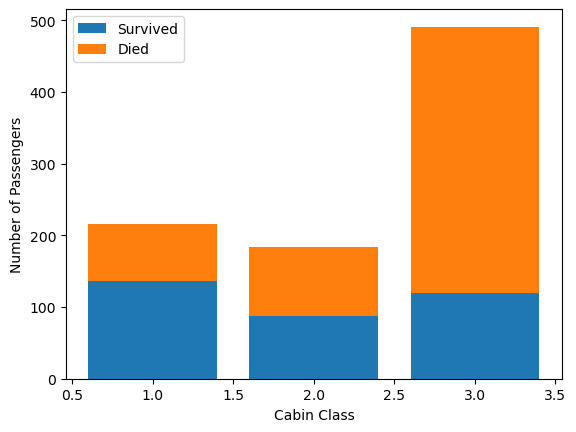

In [16]:
# Get the number of survivors and fatalities for each cabin class
survivors = df.groupby("Pclass")["Survived"].sum()
fatalities = df.groupby("Pclass")["Survived"].count() - survivors

# Create a bar chart
plt.bar(survivors.index, survivors.values, label="Survived")
plt.bar(fatalities.index, fatalities.values, bottom=survivors.values, label="Died")

# Add labels and a legend
plt.xlabel("Cabin Class")
plt.ylabel("Number of Passengers")
plt.legend()

# Display the chart
plt.show()

Thanks to our visualization, we can easily see that the survival rate was highest for passengers in first class, and lowest for passengers in third class.  We can also see that there were more fatalities than survivors in third class, but more survivors than fatalities in first and second class. This is just one example of how data visualization can help us understand our data.

## Optional Exercise: Data Visualization

In this exercise, you will create a visualization to answer the following question:

> What was the survival rate by title?

We have provided the code to extract the title from each passenger's name, and to create a new column called `Title` containing the title for each passenger.  You will need to create a visualization to answer the question above.  You can use any type of visualization you like, but we recommend a bar chart or a pie chart.


In [17]:
df["Title"] = df["Name"].str.extract(
    " ([A-Za-z]+)\.", expand=False
)  # This is a Regular Expression - a way of extracting patterns from text

In [18]:
df[
    "Title"
].value_counts()  # You might notice the title Jonkheer - this is a Dutch honorific title, the lowest in the Dutch nobility system

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

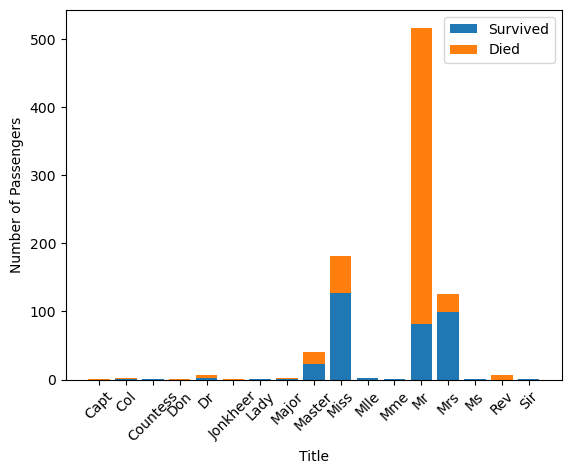

In [19]:
# One possible answer - a bar chart
survivors = df.groupby("Title")["Survived"].sum()
fatalities = df.groupby("Title")["Survived"].count() - survivors

plt.bar(survivors.index, survivors.values, label="Survived")
plt.bar(fatalities.index, fatalities.values, bottom=survivors.values, label="Died")

plt.xlabel("Title")
plt.xticks(rotation=45) # Rotates the x-axis labels by 45 degrees
plt.ylabel("Number of Passengers")
plt.legend()

plt.show()